# Data Understanding

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.display import display

The analyzed dataset consists of 2452 records, each described by 38 attributes. Three variables (actor, vocal_channel, intensity) have missing values. As we will see later, the variable 'actor' has a large number of missing values and for this reason we decided to remove it from the dataset. For the other two variables, however, we decided to fill them. 'Intensity' will be filled by a linear regression application, while vocal_channel will be filled randomly taking into consideration the frequency proportions in the dataset. After printing the values of the attributes, we noticed the presence of four variables with a single value (modality, sample_width, frame_rate, stft_max) and we decided, therefore, to remove them from the dataset as they did not contribute with additional information. In addition, frame_count and length_ms are two perfectly correlated variables, so we decided to remove frame_count as the information in the dataset would have been redundant. In addition we dropped all those columns that have a std <0.1 because they dont give a sufficient variety to the values and this application can be useful for us while we will do the cluster analysis and classification. The features that we obtained with cleaned dataset are: 'vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex', 'length_ms', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std','mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max', 'kur', 'skew', 'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'.

In [44]:
df = pd.read_csv('ravdess_features.csv', skip_blank_lines=True)
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [45]:
#Visualization of descriptive statistics
df.describe()

,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


In [46]:
#Printing information about a the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [47]:
#Showing % null values for features
df.isna().sum() / len(df)

modality               0.000000
vocal_channel          0.079935
emotion                0.000000
emotional_intensity    0.000000
statement              0.000000
repetition             0.000000
actor                  0.459217
sex                    0.000000
channels               0.000000
sample_width           0.000000
frame_rate             0.000000
frame_width            0.000000
length_ms              0.000000
frame_count            0.000000
intensity              0.332790
zero_crossings_sum     0.000000
mfcc_mean              0.000000
mfcc_std               0.000000
mfcc_min               0.000000
mfcc_max               0.000000
sc_mean                0.000000
sc_std                 0.000000
sc_min                 0.000000
sc_max                 0.000000
sc_kur                 0.000000
sc_skew                0.000000
stft_mean              0.000000
stft_std               0.000000
stft_min               0.000000
stft_max               0.000000
stft_kur               0.000000
stft_ske

In [48]:
#Unique values for each feature
df.nunique()

modality                  1
vocal_channel             2
emotion                   8
emotional_intensity       2
statement                 2
repetition                2
actor                    24
sex                       2
channels                  2
sample_width              1
frame_rate                1
frame_width               2
length_ms                95
frame_count             158
intensity               989
zero_crossings_sum     2176
mfcc_mean              2451
mfcc_std               2449
mfcc_min               2451
mfcc_max               2449
sc_mean                2451
sc_std                 2451
sc_min                 1431
sc_max                 2423
sc_kur                 2451
sc_skew                2451
stft_mean              2451
stft_std               2451
stft_min               1431
stft_max                  1
stft_kur               2451
stft_skew              2451
mean                   2450
std                    2451
min                    2148
max                 

In [49]:
#Dropping the features as explained before
df = df.drop(['modality','statement','sample_width','frame_rate', 'stft_max', 'actor','frame_count'], axis=1)

# Assessing data quality (missing values, outliers)

As mentioned above, two different approaches were used to fill in the missing values of the two columns with missing values. For the vocal_channel attribute, a function was created to fill in the missing values with randomly selected values from the columns, but respecting the proportion in which they appear within the dataset (song= 0.41 and speech=0.59).
In the case of intensity, on the other hand, the missing value was predicted through the application of a linear regression, using as training set the variables "zero_crossings_sum," "mfcc_mean," two variables highly correlated with intensity. This technique was chosen after trying to fill in the missing values through the variable's mode, median and mean values. In fact, the distributions obtained by using these methods did not respect the initial distribution of the variable, changing it significantly.

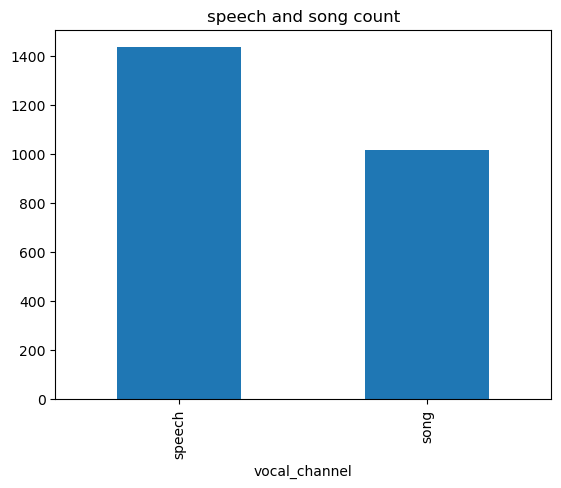

In [50]:
#We have filled vocal following the distribution of the data set 41% song and 59% speech
def fill_vocal(row):
    if pd.isnull(row['vocal_channel']):
        return np.random.choice(['song', 'speech'], p=[0.41,0.59])
    else:
        return row['vocal_channel']
df['vocal_channel'] = df.apply(fill_vocal, axis=1)
df['vocal_channel'].value_counts().plot(kind='bar', title='speech and song count')
plt.show()

### Filling Intensity building a regression model

In [51]:
not_na_mask = ~df["intensity"].isna().values
na_mask = df["intensity"].isna().values
not_na_idxs = np.argwhere(not_na_mask).ravel()
na_idxs = np.argwhere(na_mask).ravel()
not_na_idxs

array([   0,    2,    3, ..., 2448, 2450, 2451])

In [52]:
X_train = df[["zero_crossings_sum", "mfcc_mean"]].values
X_train = X_train[not_na_idxs]
X_train.shape

(1636, 2)

In [53]:
y_train = df["intensity"].values[not_na_idxs]
y_train.shape

(1636,)

In [54]:
X_test = df[["zero_crossings_sum", "mfcc_mean"]].values
X_test = X_test[na_idxs]
X_test.shape

(816, 2)

In [55]:
reg = LinearRegression()

In [56]:
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = reg.predict(X_test)
y_pred.shape, y_pred

((816,),
 array([-37.4432349 , -37.83204989, -38.26008879, -37.9852539 ,
        -42.16393717, -43.84475885, -32.9933186 , -36.38114109,
        -39.76212778, -37.71677666, -36.48801225, -36.29905132,
        -33.12778002, -38.59386774, -46.48834128, -45.19118746,
        -39.23566061, -39.26396416, -38.51970779, -34.79602483,
        -37.231938  , -36.91981294, -31.49168316, -37.12414149,
        -41.58167282, -42.30837349, -36.63942022, -42.74910113,
        -39.4391702 , -37.99298476, -29.64762615, -32.7943543 ,
        -34.41906548, -32.25141332, -42.3407148 , -33.34181486,
        -39.27570734, -46.00284944, -31.95172824, -44.60014666,
        -29.80191135, -26.1557161 , -32.09496268, -41.60271488,
        -42.23595349, -39.89939275, -43.31451297, -44.34620108,
        -29.0817448 , -31.43707187, -33.57189713, -32.50876738,
        -37.26240038, -40.23572868, -32.88427765, -35.709648  ,
        -38.14198952, -35.42915209, -28.17786874, -37.2924768 ,
        -36.57758968, -32.98335

In [58]:
df['intensity'][na_idxs] = y_pred

/var/folders/js/82fxm5rj3154nbsny8gqb1jh0000gn/T/ipykernel_67446/2000266259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensity'][na_idxs] = y_pred


### Correlation after filling every column

In [60]:
#Selected features for correlation
df_col = df[['length_ms', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std',
       'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max',
       'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max', 'kur', 'skew']]

In [61]:
#Compute pairwise correlation of selected features
pd.options.display.max_columns = None
df_corr = df_col.corr(numeric_only=True)
styled_corr = df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)
display(styled_corr)

,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew
length_ms,1.00,0.26,0.33,0.01,-0.30,0.21,-0.35,-0.55,-0.18,-0.08,-0.12,0.29,0.62,-0.07,0.60,0.07,-0.46,0.06
intensity,0.26,1.00,0.54,0.66,-0.92,0.90,-0.31,-0.32,-0.50,0.19,-0.23,0.38,0.38,-0.05,0.31,0.76,-0.10,0.34
zero_crossings_sum,0.33,0.54,1.00,0.13,-0.56,0.50,-0.45,-0.07,-0.37,0.19,-0.04,0.19,0.14,0.07,0.45,0.42,-0.12,0.20
mfcc_mean,0.01,0.66,0.13,1.00,-0.62,0.61,0.17,-0.28,-0.59,0.40,-0.38,0.36,0.25,0.02,-0.19,0.58,0.11,0.05
mfcc_std,-0.30,-0.92,-0.56,-0.62,1.00,-0.98,0.44,0.37,0.52,-0.13,0.23,-0.45,-0.47,0.07,-0.41,-0.81,0.11,-0.36
mfcc_min,0.21,0.90,0.50,0.61,-0.98,1.00,-0.40,-0.29,-0.45,0.11,-0.19,0.37,0.36,-0.07,0.33,0.82,-0.01,0.39
mfcc_max,-0.35,-0.31,-0.45,0.17,0.44,-0.40,1.00,0.15,0.21,0.08,0.00,-0.25,-0.31,0.01,-0.52,-0.32,0.23,-0.09
sc_mean,-0.55,-0.32,-0.07,-0.28,0.37,-0.29,0.15,1.00,0.53,0.13,0.42,-0.63,-0.82,-0.01,-0.64,-0.17,0.28,0.03
sc_std,-0.18,-0.50,-0.37,-0.59,0.52,-0.45,0.21,0.53,1.00,-0.45,0.59,-0.62,-0.40,-0.23,-0.23,-0.41,-0.00,0.11
sc_min,-0.08,0.19,0.19,0.40,-0.13,0.11,0.08,0.13,-0.45,1.00,-0.24,0.02,-0.09,0.11,-0.24,0.14,0.07,-0.16


## Finding Outliers with IQR method

To identify the outliers in the dataset, we decided starting our reflection from the 25% and 75% quantile. We added or subtracted from these (depending on whether it was upper or lower limit) the records that were within a distance of 1.5*IQR from the quantiles. This allowed us to select only the points that were actually most disturbing to the distribution, without limiting ourselves to the graphical outliers produced by the boxplots. In fact, using this graphical technique, we realized that the graphical outliers produced by the boxplots included many records that were not actually disturbing for the dataset.
After defining what we consider to be outliers, we defined a function able of replacing these points with random values selected from the range of non-outliers of the variable under consideration.

In [63]:
#Selected colums
col = ['length_ms', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std',
       'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max',
       'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max', 'kur', 'skew']

In [64]:
# Calculate Q1 and Q3 for each column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))

# Count the number of potential outliers in each column
outlier_counts_before = outliers.sum()

# Display the count of potential outliers for each column
print(outlier_counts_before)

length_ms              11
intensity              18
zero_crossings_sum     52
mfcc_mean              12
mfcc_std                1
mfcc_min               14
mfcc_max                1
sc_mean                 5
sc_std                 30
sc_min                  0
sc_max                439
sc_kur                152
sc_skew                35
stft_kur               69
stft_skew              14
max                   207
kur                    85
skew                   32
dtype: int64


In [65]:
def prin_IQR(df, col):
# Calculate Q1 and Q3 for each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
# Calculate IQR for each column
    IQR = Q3 - Q1
# Define lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
# Count the number of potential outliers in each column
    outlier_counts = outliers.sum()
# Display the count of potential outliers for each column
    return outliers

In [66]:
#Definition of a function to eliminate outliers
def fill_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            continue
        x = df[column]
        q1 = np.quantile(x, 0.25)
        q3 = np.quantile(x, 0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #Find index for outliers
        outliers_idx = (x < lower_bound) | (x > upper_bound)

        #Generating new random values based on the distribution of the x serie
        non_outliers = x[~outliers_idx]
        random_values = np.random.choice(non_outliers, sum(outliers_idx), replace=True)

        #Replace outliers with new values
        df.loc[outliers_idx, column] = random_values

    return df

In [67]:
fill_outliers(df)

,vocal_channel,emotion,emotional_intensity,repetition,sex,channels,frame_width,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,2nd,F,1,2,3737,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,11096.082688,-1.120769,0.250940,0.415250,0.335533,0.000000,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,1st,F,1,2,3904,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,2nd,F,1,2,4671,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,1st,F,1,2,3637,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,2nd,F,1,2,4404,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,1st,M,1,2,4605,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,speech,calm,normal,1st,M,1,2,4171,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,song,sad,strong,2nd,M,1,2,5239,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,-1.473789,0.130310,1.711986e-07,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,speech,surprised,normal,1st,M,1,2,3737,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


In [68]:
# Calculate Q1 and Q3 for each column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))

# Count the number of potential outliers in each column
outlier_counts_after = outliers.sum()

# Display the count of potential outliers for each column
print(outlier_counts_after)

length_ms               0
intensity               7
zero_crossings_sum      6
mfcc_mean               0
mfcc_std                0
mfcc_min                2
mfcc_max                0
sc_mean                 0
sc_std                  8
sc_min                  0
sc_max                356
sc_kur                 64
sc_skew                 1
stft_kur               16
stft_skew               1
max                    88
kur                    13
skew                    4
dtype: int64


We have succesfully removed the amount of outliers we express below:

In [69]:
outlier_counts_before - outlier_counts_after

length_ms              11
intensity              11
zero_crossings_sum     46
mfcc_mean              12
mfcc_std                1
mfcc_min               12
mfcc_max                1
sc_mean                 5
sc_std                 22
sc_min                  0
sc_max                 83
sc_kur                 88
sc_skew                34
stft_kur               53
stft_skew              13
max                   119
kur                    72
skew                   28
dtype: int64

# Variables transformations



We will replace all categorical variables using the binning technique to proceed later with analisys over them

In [70]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['vocal_channel'] = df['vocal_channel'].map({'speech': 0, 'song': 1})
df['emotional_intensity'] = df['emotional_intensity'].map({'normal': 0, 'strong': 1})
df['repetition'] = df['repetition'].map({'1st': 1, '2nd': 2})
pd.get_dummies(df['emotion']).astype(int)

#Adding the transformed variables to dataframe
df = pd.concat([df, pd.get_dummies(df['emotion']).astype(int)], axis=1)

In [71]:
# Drop columns with std_dev < 0.1 except for the 'emotion' column
categorical_column = 'emotion'
std_dev = df.drop([categorical_column], axis=1).std()
columns_to_drop = std_dev[std_dev < 0.1].index.difference([categorical_column])
df = df.drop(columns=columns_to_drop)
df

,vocal_channel,emotion,emotional_intensity,repetition,sex,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,3737,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,11096.082688,-1.120769,0.250940,-1.215025,0.403514,0.138947,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,3904,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,-1.384174,0.290905,0.263062,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,happy,1,2,1,4671,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,-1.242947,0.470350,0.166351,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,3637,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,-1.445318,0.274756,0.024078,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,4404,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,-1.366742,0.318926,0.242676,7.485109,0.414872,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,calm,1,1,0,4605,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,-1.075888,-0.310088,0.052399,9.551363,0.759247,0,1,0,0,0,0,0,0
2448,0,calm,0,1,0,4171,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,-1.026071,-0.408018,0.084045,22.517991,1.073633,0,1,0,0,0,0,0,0
2449,1,sad,1,2,0,5239,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,-1.473789,0.130310,0.097260,4.964319,-0.005821,0,0,0,0,0,0,1,0
2450,0,surprised,0,1,0,3737,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,-1.277117,-0.242668,0.052002,13.855588,-0.110966,0,0,0,0,0,0,0,1


In [72]:
pd.options.display.max_columns = None
display(df)

,vocal_channel,emotion,emotional_intensity,repetition,sex,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,3737,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,11096.082688,-1.120769,0.250940,-1.215025,0.403514,0.138947,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,3904,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,-1.384174,0.290905,0.263062,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,happy,1,2,1,4671,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,-1.242947,0.470350,0.166351,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,3637,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,-1.445318,0.274756,0.024078,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,4404,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,-1.366742,0.318926,0.242676,7.485109,0.414872,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,calm,1,1,0,4605,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,-1.075888,-0.310088,0.052399,9.551363,0.759247,0,1,0,0,0,0,0,0
2448,0,calm,0,1,0,4171,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,-1.026071,-0.408018,0.084045,22.517991,1.073633,0,1,0,0,0,0,0,0
2449,1,sad,1,2,0,5239,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,-1.473789,0.130310,0.097260,4.964319,-0.005821,0,0,0,0,0,0,1,0
2450,0,surprised,0,1,0,3737,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,-1.277117,-0.242668,0.052002,13.855588,-0.110966,0,0,0,0,0,0,0,1


In [73]:
#Saving the dataframe in pickle to use in clustering and classification
df.to_pickle("./dataunderstanding.pkl")